In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import sobel, gaussian_filter

%matplotlib widget

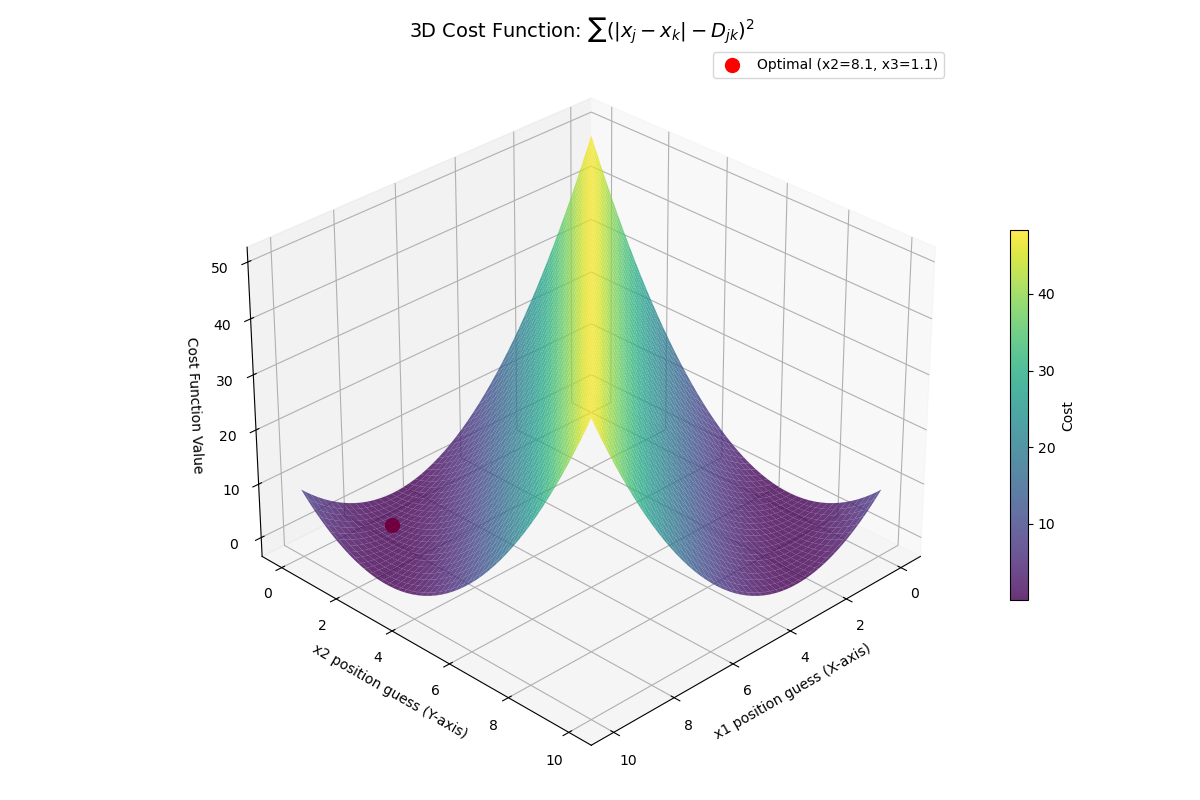

Optimal guesses: x2 = 8.08, x3 = 1.11
Minimum cost: 0.00


In [4]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 7],  # D_11, D_12
    [7, 0],  # D_21, D_22
])

# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(0, 10, 100)  # x2 guesses (X-axis)
y_guess = np.linspace(0, 10, 100)  # x3 guesses (Y-axis)
X, Y = np.meshgrid(x_guess, y_guess)

# Initialize cost matrix
cost = np.zeros_like(X)

for i in range(len(x_guess)):
    for j in range(len(y_guess)):
        x1 = X[i, j]  # Current x1 guess
        x2 = Y[i, j]  # Current x2 guess
        # Calculate absolute differences
        d12 = np.abs(x1 - x2)  # |x1 - x2|
        # Store cost for this position
        cost[i, j] = (d12 - D[0, 1])**2



# Find the minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the cost function
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark the optimal (x2, x3) guess
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x1 position guess (X-axis)')
ax.set_ylabel('x2 position guess (Y-axis)')
ax.set_zlabel('Cost Function Value')
ax.set_title(r'3D Cost Function: $\sum(|x_j - x_k| - D_{jk} )^2$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Rotate the view for better visibility
ax.view_init(elev=30, azim=45)  # Adjust angles as needed

plt.tight_layout()
plt.show()

print(f"Optimal guesses: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

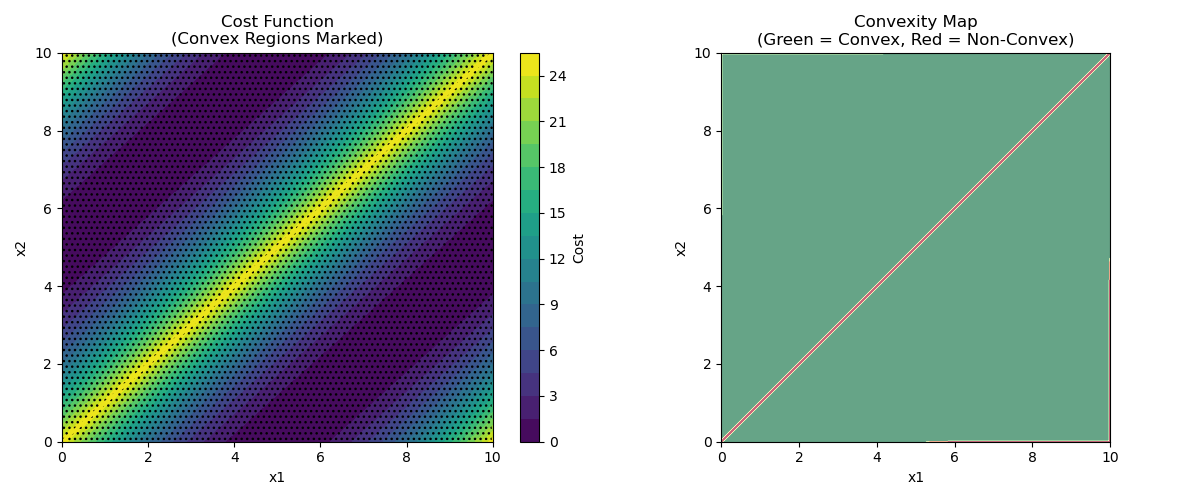

In [5]:
# Your original setup
D = np.array([[0, 5, 2], [5, 0, 3], [2, 3, 0]])
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation
d12 = np.abs(X - Y)
cost = (d12 - D[0,1])**2

# Smooth the cost to compute cleaner derivatives
cost_smooth = gaussian_filter(cost, sigma=1)

# Compute numerical Hessian components
dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis (convex if both eigenvalues ≥ 0)
eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  # Small tolerance for numerical errors

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost function with convex regions overlaid
plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)  # Convex region indicator
plt.title("Cost Function\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x2")

# Plot 2: Pure convexity map
plt.subplot(122)
plt.imshow(convex_region.T, extent=[0,10,0,10], origin='lower', 
           cmap='RdYlGn', alpha=0.6)
plt.title("Convexity Map\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x1")
plt.ylabel("x2")

plt.tight_layout()
plt.show()

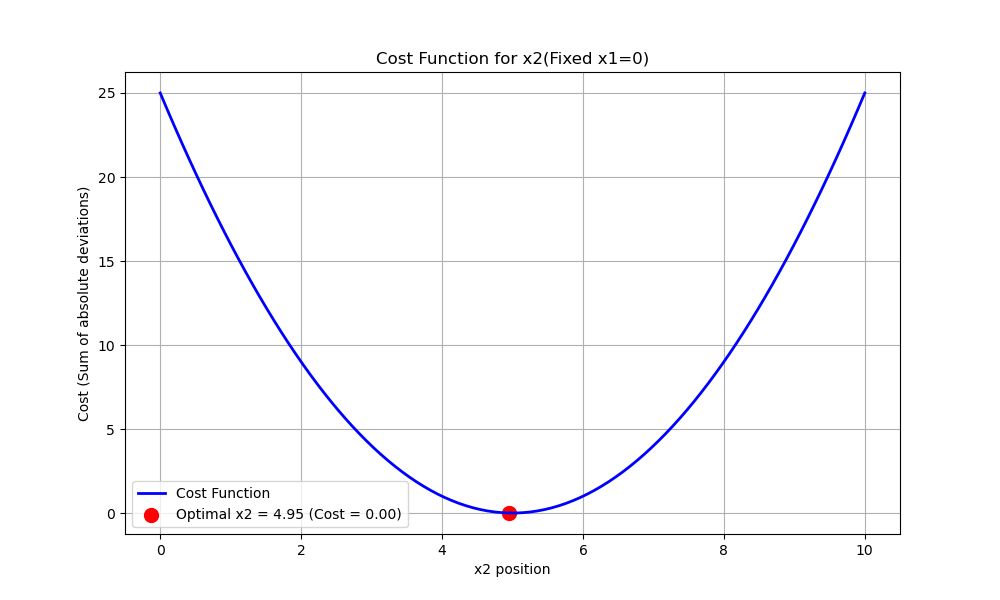

Optimal x2: 4.95
Minimum cost: 0.00


In [6]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4],  # D_11, D_12, D_13, D_14, D_15
    [5, 0, 3, 4, 1],  # D_21, D_22, D_23, D_24, D_25
    [2, 3, 0, 7, 2],  # D_31, D_32, D_33, D_34, D_35
    [9, 4, 7, 0, 5]   # D_41, D_42, D_43, D_44, D_45
])

# Fixed positions
x1= 0

# Grid of possible x5 positions
x2_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x2_guess)
for i, x2 in enumerate(x2_guess):
    # Calculate absolute differences
    d12 = np.abs(x1 - x2)

    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (d12 - D[0, 1])**2


# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x2 = x2_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x2_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x2, min_cost, color='red', s=100, 
            label=f'Optimal x2 = {optimal_x2:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x2 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x2(Fixed x1=0)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x2: {optimal_x2:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

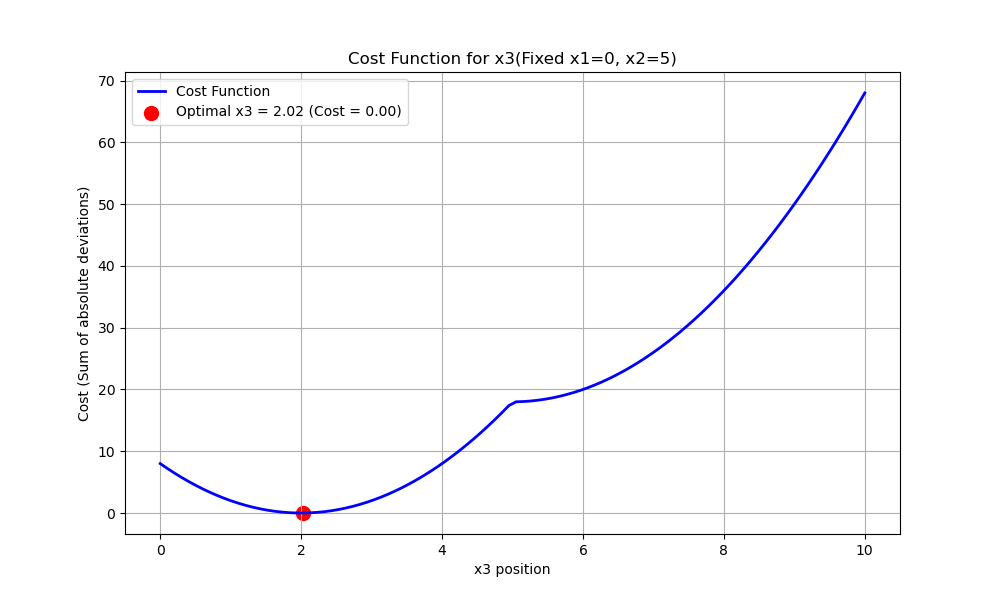

Optimal x3: 2.02
Minimum cost: 0.00


In [9]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4],  # D_11, D_12, D_13, D_14, D_15
    [5, 0, 3, 4, 1],  # D_21, D_22, D_23, D_24, D_25
    [2, 3, 0, 7, 2],  # D_31, D_32, D_33, D_34, D_35
    [9, 4, 7, 0, 5]   # D_41, D_42, D_43, D_44, D_45
])

# Fixed positions
x1, x2= 0, 5

# Grid of possible x5 positions
x3_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x3_guess)
for i, x3 in enumerate(x3_guess):
    # Calculate absolute differences
    d13 = np.abs(x1 - x3)  # |x1 - x3|
    d12 = np.abs(x1 - x2)
    d23 = np.abs(x2 - x3)  # |x2 - x3|

    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (d13 - D[0, 2])**2 + (d23 - D[1, 2])**2

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x3 = x3_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x3_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x3, min_cost, color='red', s=100, 
            label=f'Optimal x3 = {optimal_x3:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x3 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x3(Fixed x1=0, x2=5)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x3: {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

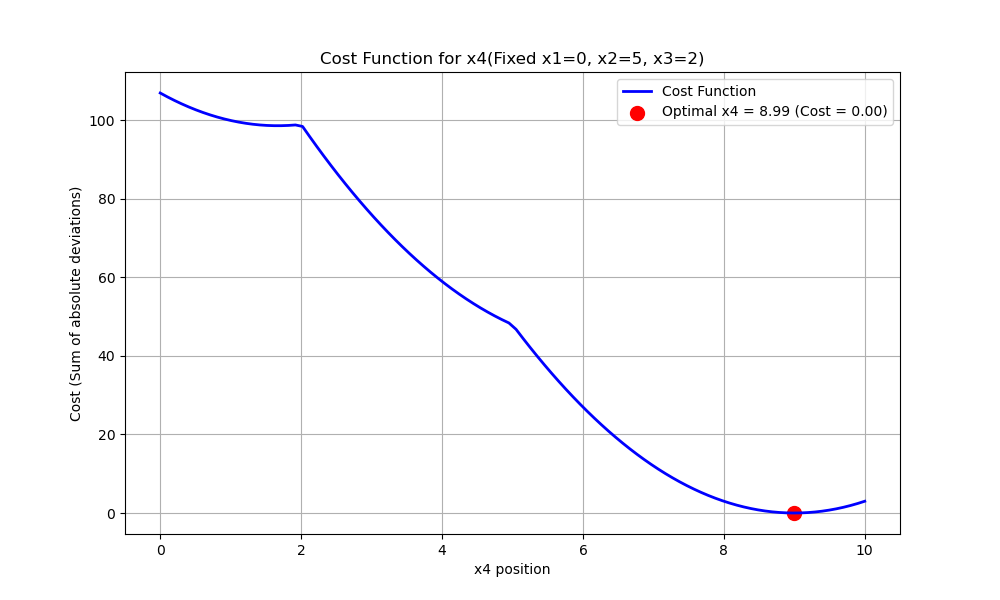

Optimal x4: 8.99
Minimum cost: 0.00


In [10]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4],  # D_11, D_12, D_13, D_14, D_15
    [5, 0, 3, 4, 1],  # D_21, D_22, D_23, D_24, D_25
    [2, 3, 0, 7, 2],  # D_31, D_32, D_33, D_34, D_35
    [9, 4, 7, 0, 5]   # D_41, D_42, D_43, D_44, D_45
])

# Fixed positions
x1, x2, x3= 0, 5, 2

# Grid of possible x5 positions
x4_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x4_guess)
for i, x4 in enumerate(x4_guess):
    # Calculate absolute differences
    d14 = np.abs(x1 - x4)  # |x1 - x5|
    d24 = np.abs(x2 - x4)  # |x2 - x5|
    d34 = np.abs(x3 - x4)  # |x3 - x5|

    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (d14 - D[0, 3])**2 + (d24 - D[1, 3])**2  + (d34 - D[2, 3])**2

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x4 = x4_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x4_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x4, min_cost, color='red', s=100, 
            label=f'Optimal x4 = {optimal_x4:.2f} (Cost = {min_cost:.2f})')


plt.xlabel('x4 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x4(Fixed x1=0, x2=5, x3=2)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x4: {optimal_x4:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

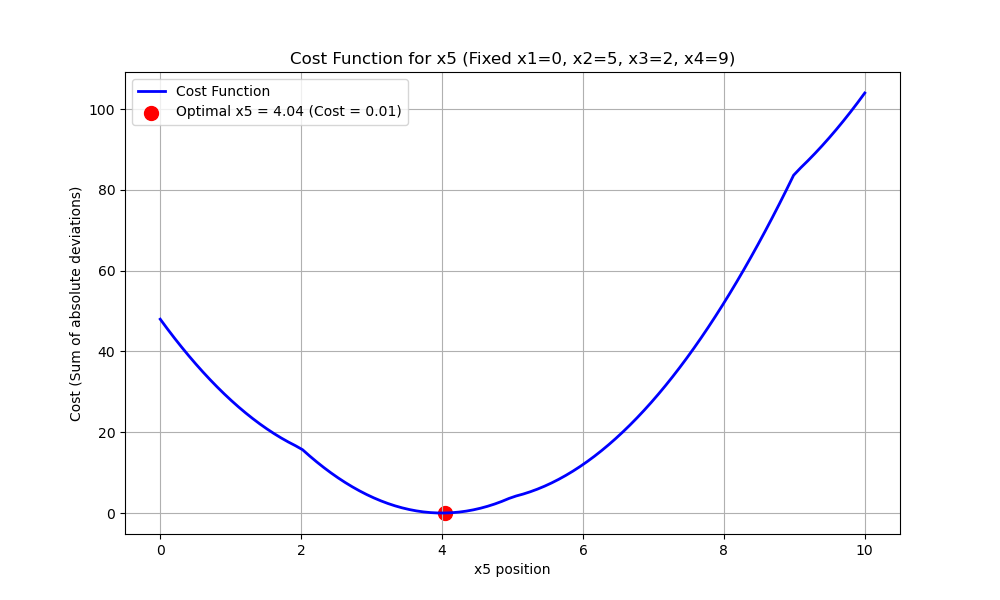

Optimal x5: 4.04
Minimum cost: 0.01


In [12]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4],  # D_11, D_12, D_13, D_14, D_15
    [5, 0, 3, 4, 1],  # D_21, D_22, D_23, D_24, D_25
    [2, 3, 0, 7, 2],  # D_31, D_32, D_33, D_34, D_35
    [9, 4, 7, 0, 5]   # D_41, D_42, D_43, D_44, D_45
])

# Fixed positions
x1, x2, x3, x4 = 0, 5, 2, 9

# Grid of possible x5 positions
x5_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x5_guess)
for i, x5 in enumerate(x5_guess):
    # Calculate absolute differences
    d15 = np.abs(x1 - x5)  # |x1 - x5|
    d25 = np.abs(x2 - x5)  # |x2 - x5|
    d35 = np.abs(x3 - x5)  # |x3 - x5|
    d45 = np.abs(x4 - x5)  # |x4 - x5|
    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (d15 - D[0, 4])**2  + (d25 - D[1, 4])**2  + (d35 - D[2, 4])**2  + (d45 - D[3, 4])**2 

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x5 = x5_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x5_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x5, min_cost, color='red', s=100, 
            label=f'Optimal x5 = {optimal_x5:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x5 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x5 (Fixed x1=0, x2=5, x3=2, x4=9)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x5: {optimal_x5:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

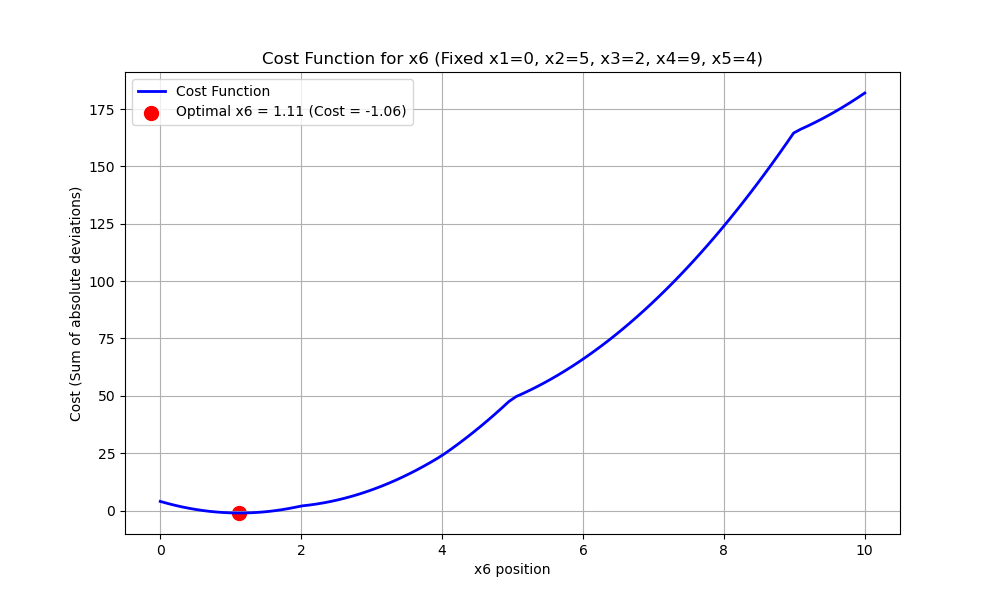

Optimal x5: 1.11
Minimum cost: -1.06


In [13]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11], 
    [5, 0, 3, 4, 1, 4, 2, 6], 
    [2, 3, 0, 7, 2, 1, 5, 9], 
    [9, 4, 7, 0, 5, 8, 2, 2],
    [4, 1, 2, 5, 0, 4, 2, 6],
    [1, 4, 1, 8, 4, 0, 6, 10],
    [7, 2, 5, 2, 2, 6, 0, 4],
    [11, 6, 9, 2, 6, 10, 4, 0]
])

# Fixed positions
x1, x2, x3, x4,x5 = 0, 5, 2, 9, 4

# Grid of possible x5 positions
x6_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x6_guess)
for i, x6 in enumerate(x6_guess):
    # Calculate absolute differences
    d16 = np.abs(x1 - x6)  # |x1 - x5|
    d26 = np.abs(x2 - x6)  # |x2 - x5|
    d36 = np.abs(x3 - x6)  # |x3 - x5|
    d46 = np.abs(x4 - x6)  # |x4 - x5|
    d56 = np.abs(x5 - x6)  # |x4 - x5|
    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (d16 - D[0, 5])**2  + (d26 - D[1, 5])**2  + (d36 - D[2, 5])**2  + (d46 - D[3, 5])**2  +(d56 - D[4, 5])

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x6 = x6_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x6_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x6, min_cost, color='red', s=100, 
            label=f'Optimal x6 = {optimal_x6:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x6 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x6 (Fixed x1=0, x2=5, x3=2, x4=9, x5=4)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x5: {optimal_x6:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

In [14]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

# Fixed positions
x1, x2, x3, x4,x5,x6,x7,x8,x9 = 0, 5, 2, 9, 4, 1, 7, 11, 15

# Grid of possible x5 positions
x0_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x0_guess)
for i, x0 in enumerate(x0_guess):
    # Calculate absolute differences
    d10 = np.abs(x1 - x0)  # |x1 - x5|
    d20 = np.abs(x2 - x0)  # |x2 - x5|
    d30 = np.abs(x3 - x0)  # |x3 - x5|
    d40 = np.abs(x4 - x0)  # |x4 - x5|
    d50 = np.abs(x5 - x0)  # |x4 - x5|
    d60 = np.abs(x6 - x0)
    d70 = np.abs(x7 - x0)
    d80 = np.abs(x8 - x0)
    d90 = np.abs(x9 - x0)
    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (d10 - D[0, 9])**2  + (d20 - D[1, 9])**2  + (d30 - D[2, 9])**2  + (d40 - D[3, 9])**2  +(d50 - D[4, 9])**2  +(d60 - D[5, 9])**2  + (d70 - D[6, 9])**2  +(d80 - D[7, 9])**2  +(d90 - D[8, 9])**2 

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x0 = x0_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x0_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x0, min_cost, color='red', s=100, 
            label=f'Optimal x10 = {optimal_x0:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x10 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x10 (Fixed all other points)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x10: {optimal_x0:.2f}")
print(f"Minimum cost: {min_cost:.2f}")


SyntaxError: invalid syntax (3970045845.py, line 35)